Here is a simple example of how the package can be used and what requirements must be met in order to be able to use the full range of functions.
A basic requirement is the availability of downloaded satellite image data (so far only Sentinel-2 is supported). The data structure should look similar to this: 

![Example data structure](./img/example_data_structure.png)

The most important thing is that the bands in the folder are marked with a "B" and the number and stored as GeoTIFF, e.g. ..._B02.tif, ..._B12.tif. If the data is to be pre-processed for a deep learning model, then a file with the corresponding labels must also be provided for each image and contain the name annotation (see example: annotation.tif).

In [1]:
# Make sure the package is installed
# pip install satellite_datacube

In [2]:
from satellite_datacube.datacube import SatelliteDataCube 
import os 
# Define folder of satellite data and specify some parameters (read more in the doc-string)
satellite = "S2" # or S1 or S12
base_folder = r"D:\SatelliteDataCube\Chimanimani" # path_of_SITS = ".../Sentinel2"
S2_Chimanimani = SatelliteDataCube(satellite=satellite, base_folder=base_folder)

Cannot find header.dxf (GDAL_DATA is not defined)



----------------------------------------
Initialized data-cube with following parameter:
- Images from satellite mission: S2
- Base folder: D:\SatelliteDataCube\Chimanimani
- Start-End: 2018-09-06 -> 2019-09-16
- Length of data-cube: 76
----------------------------------------


In [3]:
# Make a selection of images and store them as timeseries 
S2_Chimanimani_ts10 = S2_Chimanimani.create_timeseries(timeseries_length=6)

Selecting timeseries with 6 satellite images of data-cube


In [4]:
# See selected timeseries and check the length of it
for idx, satellite_image in enumerate(S2_Chimanimani_ts10):
    print(f"{idx+1}: Satellite image on date {satellite_image.date}")

1: Satellite image on date 2018-09-06
2: Satellite image on date 2018-11-20
3: Satellite image on date 2019-01-24
4: Satellite image on date 2019-04-29
5: Satellite image on date 2019-07-03
6: Satellite image on date 2019-09-11


In [5]:
# Creates patches of satellite images and corresponding masks + global mask
# Filters created patches based on the class values for a binary classification (0-1)
# Save filtered patches in patches_folder

# patches_folder = r"D:\SatelliteDataCube\Chimanimani\patches"
# S2_Chimanimani_pt256_ts10 = S2_Chimanimani.process_patches(
#     patch_size=256, 
#     class_values=[1], 
#     selected_timeseries=S2_Chimanimani_ts10, 
#     indices=False, 
#     patches_folder=patches_folder
# )

In [6]:
shapefile = r"D:\SatelliteDataCube\Chimanimani\shp\Zimb_Chimanimani_LS_tidy_s2.shp"
S2_Chimanimani_spectralSig = S2_Chimanimani.create_spectral_signature(
    shapefile=shapefile,
    selected_timeseries=S2_Chimanimani_ts10,
    output_folder=r"D:\SatelliteDataCube\Chimanimani\test_folder"
    )

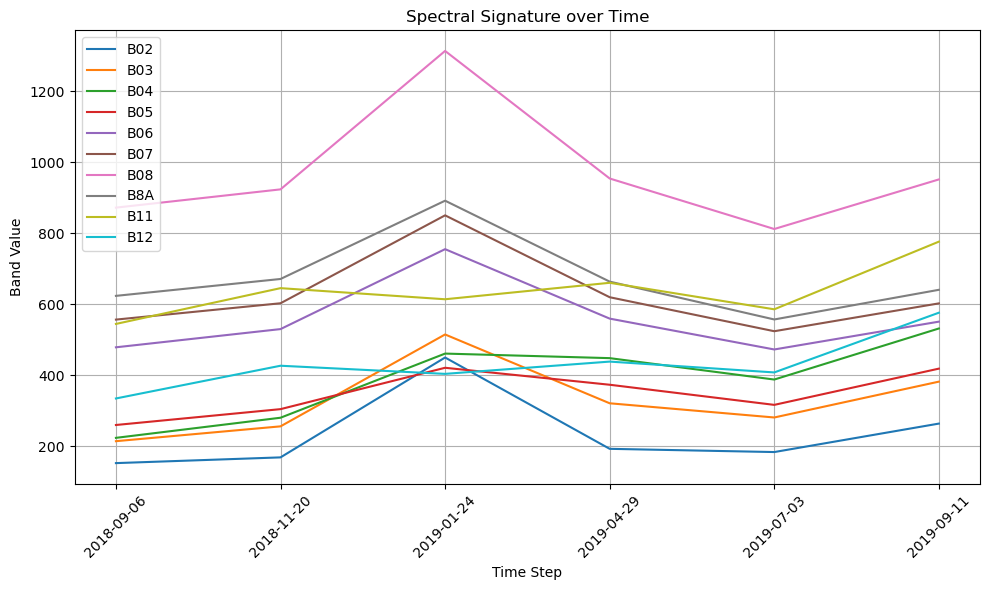

<Figure size 640x480 with 0 Axes>

In [7]:
S2_Chimanimani.plot_spectral_signature(
    spectral_signature=S2_Chimanimani_spectralSig,
    output_folder=r"D:\SatelliteDataCube\Chimanimani\test_folder"
    )